In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, math, time
from sklearn import model_selection, datasets, linear_model, metrics

In [51]:
def gen_rand_vel(sigma, limit=600, loc=0):
    while True:
        num = round( np.random.normal(loc, sigma), 3)
        if abs(num) <= limit: 
            return num

## Создание векторов точек из трёх нормальных распределений
Поскольку в реальной жизни модули скоростей зависят друг от друга, маловероятно появление векторов типа (500, 12) или (-2, 230). Будет разумно генерировать вектора скоростей с разными дисперсиями, например $\sigma$ = [10, 50, 100, 400]

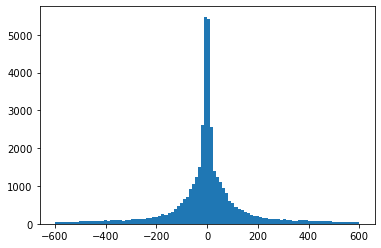

In [9]:
data = [gen_rand_vel(10) for i in range(10000)]
data.extend( [gen_rand_vel(50) for i in range(10000)] )
data.extend( [gen_rand_vel(100) for i in range(10000)] )
data.extend( [gen_rand_vel(400) for i in range(10000)] )
# print(data[:100])
plt.hist(data, 100)
plt.show()

In [10]:
for i in range(4):
    gen_rand = lambda min, max: round( random.uniform(min, max), 3)
    x = gen_rand(-0.15, 0.15)
    y = gen_rand(-0.15, 0.15)
    z = gen_rand(0.08, 0.8)
    cords = (x, y ,z)
    ball_vel = ( gen_rand(-600, 600), gen_rand(-600, 600) )
    print(cords, ball_vel)

(0.037, -0.043, 0.309) (444.697, -21.242)
(-0.122, 0.052, 0.367) (-313.49, 425.573)
(0.061, -0.01, 0.402) (-299.342, 66.113)
(-0.048, -0.124, 0.716) (-313.35, -60.812)


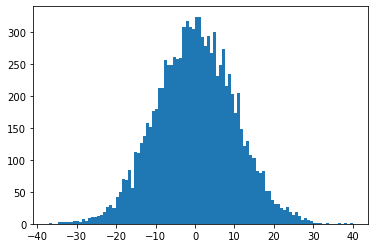

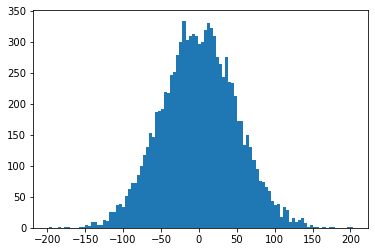

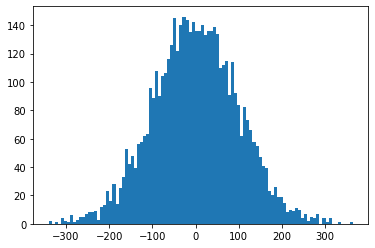

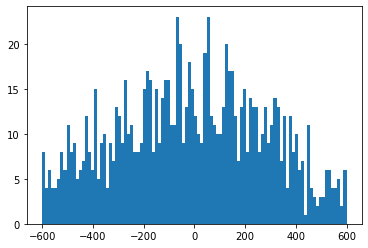

In [25]:
pairs = [(10, 10000), (50, 10000), (100, 5000), (400, 1000)] # (sigma, count of samples)

for pair in pairs:
    sigma, count = pair
    data = [gen_rand_vel(sigma) for i in range(count)]
    plt.hist(data, 100)

    plt.show()

In [158]:
# pairs = [(10, 10000), (50, 10000), (100, 5000), (400, 1000)] # (sigma, count of samples)

pairs = [(10, 10), (50, 10), (100, 5), (400, 10)] # (sigma, count of samples)
gen_rand = lambda min, max: round( random.uniform(min, max), 3)
arr = []

for pair in pairs:
    sigma, count = pair
    
    
    for i in range(count):
        x = gen_rand(-0.15, 0.15)
        y = gen_rand(-0.15, 0.15)
        z = gen_rand(0.08, 0.8)
        cords = (x, y ,z)
        ball_vel = ( gen_rand_vel(sigma), gen_rand_vel(sigma) )
        arr.append([*cords, *ball_vel])
        print(arr[-1])
    print()
    
#     plt.hist(data, 100)

#     plt.show()

[-0.021, 0.09, 0.587, 5.953, -16.434]
[-0.11, -0.063, 0.173, 7.713, 9.357]
[-0.134, -0.041, 0.798, -5.169, -0.452]
[-0.046, -0.053, 0.747, 19.447, 16.406]
[0.055, 0.107, 0.561, -2.072, -1.187]
[0.099, -0.051, 0.324, 17.089, 2.98]
[-0.121, -0.017, 0.785, 12.528, -3.595]
[-0.003, -0.088, 0.642, 11.8, 14.21]
[-0.006, -0.071, 0.195, 5.479, 1.324]
[-0.045, -0.084, 0.686, -5.085, 12.973]

[0.106, -0.001, 0.525, 7.387, 75.816]
[0.015, -0.131, 0.451, 16.858, 98.628]
[-0.126, -0.027, 0.44, -2.846, -12.104]
[0.061, 0.082, 0.358, -27.332, 25.705]
[-0.017, 0.113, 0.214, -10.678, 46.661]
[0.021, 0.086, 0.276, 6.508, 53.207]
[-0.079, -0.045, 0.654, 99.562, -52.644]
[0.077, -0.013, 0.644, 11.56, -18.399]
[-0.028, 0.023, 0.684, 4.725, -45.726]
[-0.099, -0.137, 0.254, -66.455, 14.295]

[0.006, 0.118, 0.547, 65.235, -62.043]
[-0.039, -0.106, 0.61, -8.062, -32.106]
[-0.141, -0.082, 0.658, 41.92, -73.728]
[0.118, -0.138, 0.458, 87.599, 116.513]
[-0.023, -0.128, 0.791, 37.902, -2.74]

[-0.065, -0.017, 0.32

In [159]:
data = pd.DataFrame(arr, columns=['x', 'y', 'z', 'x_vel', 'y_vel'])
print(data)
data.to_csv('data/01_checked_dots.csv', index=False)

        x      y      z    x_vel    y_vel
0  -0.021  0.090  0.587    5.953  -16.434
1  -0.110 -0.063  0.173    7.713    9.357
2  -0.134 -0.041  0.798   -5.169   -0.452
3  -0.046 -0.053  0.747   19.447   16.406
4   0.055  0.107  0.561   -2.072   -1.187
5   0.099 -0.051  0.324   17.089    2.980
6  -0.121 -0.017  0.785   12.528   -3.595
7  -0.003 -0.088  0.642   11.800   14.210
8  -0.006 -0.071  0.195    5.479    1.324
9  -0.045 -0.084  0.686   -5.085   12.973
10  0.106 -0.001  0.525    7.387   75.816
11  0.015 -0.131  0.451   16.858   98.628
12 -0.126 -0.027  0.440   -2.846  -12.104
13  0.061  0.082  0.358  -27.332   25.705
14 -0.017  0.113  0.214  -10.678   46.661
15  0.021  0.086  0.276    6.508   53.207
16 -0.079 -0.045  0.654   99.562  -52.644
17  0.077 -0.013  0.644   11.560  -18.399
18 -0.028  0.023  0.684    4.725  -45.726
19 -0.099 -0.137  0.254  -66.455   14.295
20  0.006  0.118  0.547   65.235  -62.043
21 -0.039 -0.106  0.610   -8.062  -32.106
22 -0.141 -0.082  0.658   41.920  

# After finding the initial values we need to find the best solution for each of them. 
## For example:

In [ ]:
search_for_sol(5000, '01_checked_dots.csv')

## this command will start searching for solutions for each row in the table starting with 5000th

# Объединение нескольких csv (Merge)
### Different parts of the same csv file are solved on the servers. Let's combine it into one dataframe

In [11]:
da1 = pd.read_csv('data/semi/' + '1-5000.csv')
da2 = pd.read_csv('data/semi/' + '2-1829.csv')
da3 = pd.read_csv('data/semi/' + '3-1035.csv')
da4 = pd.read_csv('data/semi/' + '4-654.csv')
da5 = pd.read_csv('data/semi/' + '4-2-350.csv')

def merge_csv(x, y):
    count_in_first = x.count().score
    count_in_second = y.count().score
    x.update(y)
    print('{} cases + {} cases = {} distinct cases'.format(count_in_first, count_in_second, x.count().score) )
    return x

all_in_one = merge_csv(merge_csv(merge_csv(merge_csv(da1, da2), da3), da4), da5)

5001 cases + 5113 cases = 6964 distinct cases
6964 cases + 6037 cases = 8000 distinct cases
8000 cases + 6692 cases = 8655 distinct cases
8655 cases + 5347 cases = 9000 distinct cases


In [12]:
all_in_one.shape

(26000, 10)

In [13]:
all_in_one.dropna()

,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay,score
0,0.101,-0.119,0.422,10.615,-9.148,-6.523658,-5.685991,0.404929,46.717107,0.971391
1,-0.001,0.024,0.179,10.565,5.667,1.881013,-0.000616,0.968161,29.071669,0.954244
2,-0.027,0.108,0.627,-15.856,-0.962,13.332427,6.424485,0.683311,39.804381,0.658047
3,0.104,-0.018,0.395,20.382,15.116,0.000075,-6.324480,0.382367,44.157762,0.945130
4,0.086,-0.012,0.194,-17.039,-20.237,0.000257,-4.563653,0.698303,29.848553,0.875869
...,...,...,...,...,...,...,...,...,...,...
25995,-0.072,-0.009,0.278,207.829,-142.608,-9.182039,-10.096633,0.715742,39.437170,0.882428
25996,-0.148,0.120,0.461,228.942,-219.372,-12.319799,-10.082610,0.445715,41.066767,0.718778
25997,-0.054,0.135,0.729,-39.757,-173.994,-11.634128,9.055998,0.480315,41.996283,0.409240
25998,-0.127,-0.095,0.519,116.445,150.744,12.439913,-5.493991,0.480065,20.001615,0.534298


## Отбор по условиям. We choose only the best

In [14]:
good = all_in_one[all_in_one['score'] > 0.8]
bad = all_in_one[all_in_one['score'] == 0]

good.to_csv('data/' + '02_good.csv', index=False)
bad.to_csv('data/' + 'bad.csv', index=False)
good

,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay,score
0,0.101,-0.119,0.422,10.615,-9.148,-6.523658,-5.685991,0.404929,46.717107,0.971391
1,-0.001,0.024,0.179,10.565,5.667,1.881013,-0.000616,0.968161,29.071669,0.954244
3,0.104,-0.018,0.395,20.382,15.116,0.000075,-6.324480,0.382367,44.157762,0.945130
4,0.086,-0.012,0.194,-17.039,-20.237,0.000257,-4.563653,0.698303,29.848553,0.875869
5,-0.015,-0.037,0.190,-0.036,6.637,-0.000081,0.000264,0.668299,30.320623,0.853169
...,...,...,...,...,...,...,...,...,...,...
25989,0.038,-0.141,0.135,-297.577,16.796,-5.389699,19.144031,0.861369,16.491543,0.872030
25992,0.034,0.006,0.398,-140.796,-94.286,-5.794349,7.497010,0.404426,44.553993,0.982263
25993,-0.003,-0.079,0.136,136.550,24.156,-2.818070,-9.044647,0.888450,20.478109,0.999044
25994,0.039,-0.005,0.127,9.301,-154.837,-10.668949,-2.824752,0.878546,18.317232,0.991386


# Аугментация данных (data augmentation)
## Each case obtained in the previous steps can be multiplied 3 times by rotating 90, 180, 270 degrees. This is a classic example of data augmentation
### [Note about rotations](https://flexbooks.ck12.org/cbook/ck-12-interactive-middle-school-math-8-for-ccss/section/1.10/primary/lesson/rotations-on-the-coordinate-plane-msm8-ccss/)

In [15]:
def augment(input_file_name, output_file_name):
    data = pd.read_csv('data/' + input_file_name)
    new_data = []
    print(new_data)
    for i in range(len(data)):
        case = data.iloc[i]
        x, y, z, x_vel, y_vel, alpha, beta, z_vel, delay, score = case.x, case.y, case.z, case.x_vel, case.y_vel, case.alpha, case.beta, case.z_vel, case.delay, case.score
        new_data.append((x, y, z, x_vel, y_vel, alpha, beta, z_vel, delay, score)) # 0 deg
        new_data.append((y, -x, z, y_vel, -x_vel, beta, -alpha, z_vel, delay, score)) # 90 deg clockwise
        new_data.append((-x, -y, z, -x_vel, -y_vel, -alpha, -beta, z_vel, delay, score)) # 180 deg
        new_data.append((-y, x, z, -y_vel, x_vel, -beta, alpha, z_vel, delay, score)) # 270 deg
    data2 = pd.DataFrame(new_data, columns=['x', 'y', 'z', 'x_vel', 'y_vel', 'alpha', 'beta', 'z_vel', 'delay', 'score'])
    data2.to_csv('data/' + output_file_name, index=False)

augment('02_good.csv', '03_for_train.csv')

[]


In [16]:
data = pd.read_csv('data/' + '03_for_train.csv')
print(data.shape)
data.head(8)

(12408, 10)


,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay,score
0,0.101,-0.119,0.422,10.615,-9.148,-6.523658,-5.685991,0.404929,46.717107,0.971391
1,-0.119,-0.101,0.422,-9.148,-10.615,-5.685991,6.523658,0.404929,46.717107,0.971391
2,-0.101,0.119,0.422,-10.615,9.148,6.523658,5.685991,0.404929,46.717107,0.971391
3,0.119,0.101,0.422,9.148,10.615,5.685991,-6.523658,0.404929,46.717107,0.971391
4,-0.001,0.024,0.179,10.565,5.667,1.881013,-0.000616,0.968161,29.071669,0.954244
5,0.024,0.001,0.179,5.667,-10.565,-0.000616,-1.881013,0.968161,29.071669,0.954244
6,0.001,-0.024,0.179,-10.565,-5.667,-1.881013,0.000616,0.968161,29.071669,0.954244
7,-0.024,-0.001,0.179,-5.667,10.565,0.000616,1.881013,0.968161,29.071669,0.954244


# Linear regression for each target feature separately
## Самый очевидный и простой подход (The most obvious and simple approach)

In [42]:
data = data.sample(frac=1)
data

,x,y,z,x_vel,y_vel,alpha,beta,z_vel,delay,score
5299,0.051,-0.027,0.277,-6.975,3.478,0.000417,-3.142864,0.513826,37.258592,0.878259
9383,-0.034,0.045,0.314,-16.859,-3.205,-0.001532,3.298935,0.481199,40.304152,0.841186
9934,-0.032,-0.134,0.140,60.898,223.046,11.070110,-3.285782,0.500024,19.264425,0.886841
1343,-0.089,-0.030,0.098,4.979,-1.867,-2.661267,7.264098,0.914378,12.067010,0.972538
10849,-0.085,-0.066,0.170,71.245,100.779,3.683302,0.001279,0.905717,28.077323,0.953505
...,...,...,...,...,...,...,...,...,...,...
6468,0.023,-0.091,0.344,-3.171,-0.432,-5.305645,-0.000491,0.486484,43.423725,0.915767
8815,0.069,0.098,0.198,9.565,2.897,6.028624,-4.791231,0.763767,30.574023,0.992145
10866,-0.019,0.107,0.269,-32.746,28.459,5.748225,0.000133,0.687219,39.851602,0.811618
11881,0.115,0.093,0.402,-204.687,-25.441,2.087820,9.889418,0.409165,44.515940,0.954616


In [43]:
train_data = data.iloc[:-1000, :]
test_data = data.iloc[-1000:, :]
print(train_data.shape, test_data.shape, data.shape)

(11408, 10) (1000, 10) (12408, 10)


In [ ]:
train_labels = train_data['alpha'].values
train_data = train_data.drop(['alpha', 'beta', 'z_vel', 'delay', 'score'], axis = 1)

In [46]:
test_labels = test_data['alpha'].values
test_data = test_data.drop(['alpha', 'beta', 'z_vel', 'delay', 'score'], axis = 1)

In [48]:
train_data.head()

,x,y,z,x_vel,y_vel
5299,0.051,-0.027,0.277,-6.975,3.478
9383,-0.034,0.045,0.314,-16.859,-3.205
9934,-0.032,-0.134,0.140,60.898,223.046
1343,-0.089,-0.030,0.098,4.979,-1.867
10849,-0.085,-0.066,0.170,71.245,100.779


In [49]:
regressor = linear_model.SGDRegressor(random_state = 0, max_iter=5)
regressor.fit(train_data, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(max_iter=5, random_state=0)

In [55]:
pred = regressor.predict(train_data)
metrics.mean_absolute_error(train_labels, pred)

1533473605399.0945

In [56]:
regressor.coef_

array([-1.23751300e+10, -2.56619776e+10, -1.18432604e+10, -3.65189325e+10,
       -4.65141625e+10])